In [1]:
import timeit
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv("cancer_data.csv",header=None)# reads the file without converting the first line to the indexes of the columns
X_before_normalize=df.iloc[:,:-1] #choose all column except of the last one.
y_before_normalize=df.iloc[:,-1] #choose the last column to be the y to predict
# X and y normalization:
X_mean=np.mean(X_before_normalize,axis=0)
X_std=np.std(X_before_normalize,axis=0)
y_mean=np.mean(y_before_normalize,axis=0)
y_std=np.std(y_before_normalize,axis=0)
X_normalize=(X_before_normalize-X_mean)/X_std
y_normalize=(y_before_normalize-y_mean)/y_std

# normalization check:
#X.mean(X_normalize,axis=0)
#np.mean(y_normalize,axis=0)
#np.std(X_normalize,axis=0)
#np.std(y_normalize,axis=0)

# Adds intercept to X:
intercept= pd.Series(1, index=X_normalize.index)# creates a series with the num of rows in data size
X_normalize.insert(0, 'intercept', intercept) #push the intercept to the first column

full_df=X_normalize.copy()
full_df["y"]=y_normalize.copy()

np.random.seed(42)

# shuffled the data by rows(frac=1):
shuffled_data=full_df.sample(frac=1).reset_index(drop=True)

## functions:

In [2]:
def h(X,theta):
    return np.dot(X, theta)

In [3]:
def cost_J(X,y,theta):
    m=X.shape[0] # the number of rows 
    return (1/(2*m))*((np.linalg.norm(h(X,theta)-y))**2)

In [4]:
def grad_J(X,y,theta):
    m=X.shape[0]
    predictions = h(X,theta)
    errors=(predictions-y)
    # Compute gradient using matrix multiplication:
    return (1/m)*(np.dot(X.T,errors))

In [5]:
def SGD(X,y,alpha=0.01,epochs=100):
    cost_per_theta = []
    sgd_theta=np.zeros(X.shape[1])
    for _ in range(epochs):
        current_cost=cost_J(X,y,sgd_theta)
        cost_per_theta.append(current_cost)
        ## Update theta using Stochastic Gradient Descent
        sgd_theta=sgd_theta-alpha*grad_J(X,y,sgd_theta) 
        
    return cost_per_theta
    

In [6]:
def batch_gradient_descent(X, y, alpha=0.1,epochs=100, b=32):
    cost_by_theta =[]
    current_theta = np.zeros(X.shape[1])
    for index in range(epochs):
        current_cost = cost_J(X,y,theta=current_theta)
        cost_by_theta.append(current_cost)
        # Select a mini-batch of size b from the data:
        t=(index*b)%len(shuffled_data) 
        # Update theta using batch gradient descent:
        current_theta=current_theta-alpha*grad_J(X=shuffled_data.iloc[t:t+b,:-1],y=shuffled_data.iloc[t:t+b,-1],theta= current_theta) 
    return cost_by_theta

## Vanilla with different alphas:

In [7]:
def vanilla_for_different_alpha(X, y, epochs=100):
  fig, axs = plt.subplots(1, 4, figsize=(15, 5))
  alpha_arr = [0.3, 0.1, 0.01, 0.001]

  # runing gradient descent 4 times with different alphas:
  for i, alpha in enumerate(alpha_arr):
    cost_per_alpha=SGD(X,y,alpha=alpha,epochs=epochs)

    axs[i].plot(np.arange(1, len(cost_per_alpha) + 1),cost_per_alpha,"o")
    axs[i].set_xlabel(f'Iteration number')
    axs[i].set_ylabel("Cost - J(theta)")  
    axs[i].set_title(f'Cost vs. Iterations (alpha={alpha})')


  plt.tight_layout()
  plt.show()  

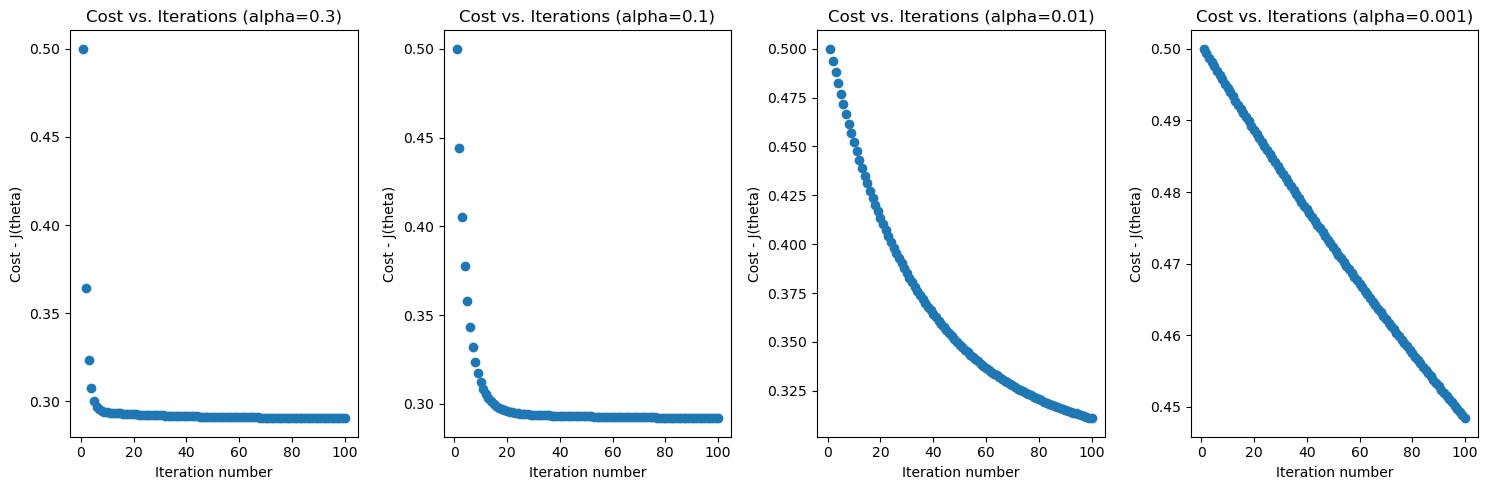

In [8]:
vanilla_for_different_alpha(X_normalize, y_normalize)

conclusions: 
from the alpha's that we tested the best alpha is 0.3,
because it is both stable and converges the fastest, meaning only about 10 iterations are enough to reach a minimal cost


## Mini batch with different alphas and different b:

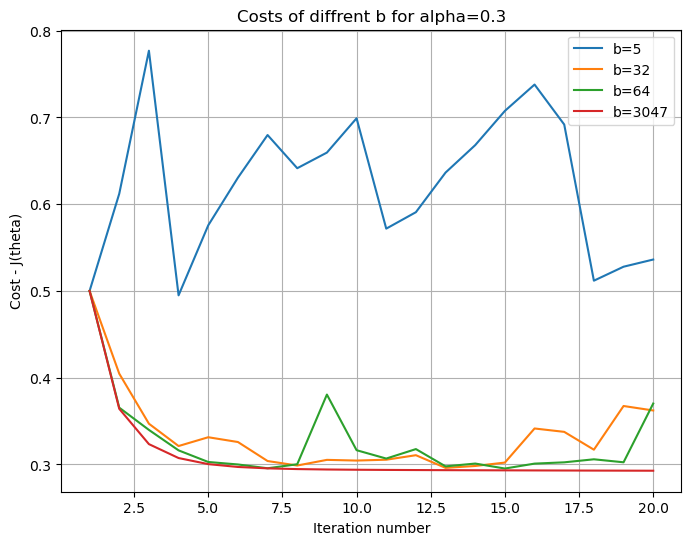

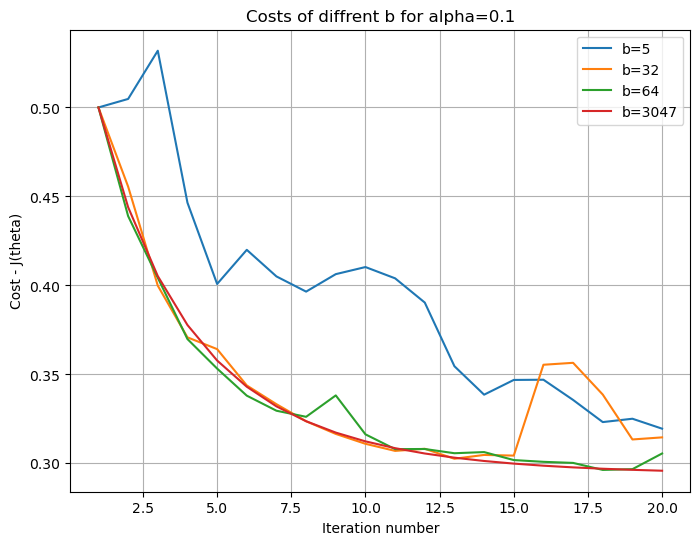

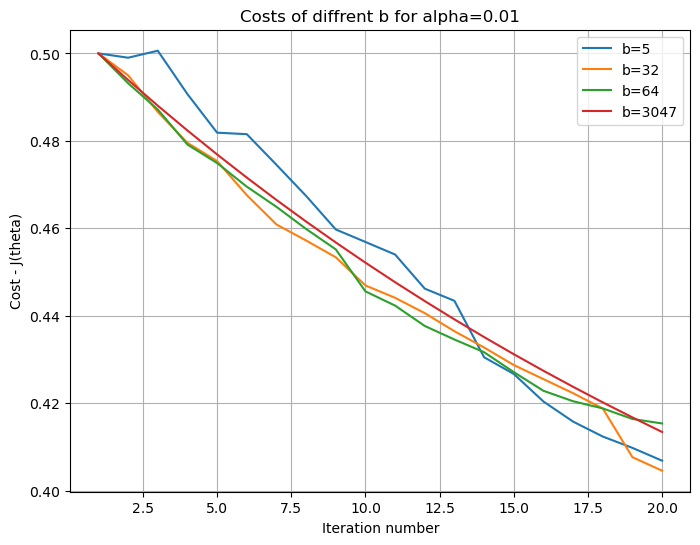

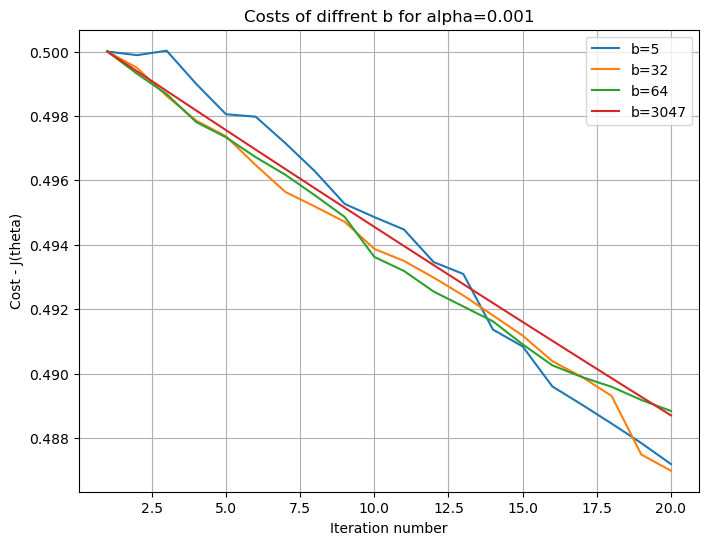

In [9]:

alphas = [0.3, 0.1, 0.01, 0.001]

# Iterate over each alpha value
for alpha in alphas:
    cost_per_b = []
    batch = [5, 32,64,3047]

    for b in batch: 
        temp = batch_gradient_descent(X_normalize, y_normalize, alpha, epochs=20, b=b)
        cost_per_b.append(temp)

    
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(1,21),cost_per_b[0],label="b=5")
    plt.plot(np.arange(1,21),cost_per_b[1],label="b=32")
    plt.plot(np.arange(1,21),cost_per_b[2],label="b=64")
    plt.plot(np.arange(1,21),cost_per_b[3],label="b=3047")

    plt.title(f"Costs of diffrent b for alpha={alpha}")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost - J(theta)")

    plt.legend()
    plt.grid(True)
    plt.show()


Upon examination, it becomes evident that compared to a batch size of 3047 (representing the vanilla approach that utilizes the complete gradient), a batch size of 64 proves to be sufficient for cost calculation. Moreover, even a smaller batch size, such as 32, demonstrates stability in most instances. However, it's notable that when the batch size becomes excessively small, stability diminishes significantly. Consequently, it's prudent to select a batch size of 64 from the range of batch sizes tested, as it strikes a balance between computational efficiency and stability, ensuring reliable and efficient optimization processes.

## Mini batch with different alphas and the const b:

In [10]:
def mini_batch_different_alpha(X, y, epochs=100, batch=64):

  # Plotting all three alpha values in one line with subplots
  fig, axs = plt.subplots(1, 4, figsize=(15, 5))
  alpha_arr = [0.3, 0.1, 0.01, 0.001]

  for i, alpha in enumerate(alpha_arr):
    cost_per_alpha=batch_gradient_descent(X,y,alpha, epochs=epochs,b=batch)

    axs[i].plot(np.arange(1, len(cost_per_alpha) + 1), cost_per_alpha, "o")
    axs[i].set_xlabel(f'Iteration Number')
    axs[i].set_ylabel('Cost - J(theta)')
    axs[i].set_title(f'Cost vs. Iterations (alpha={alpha})')

  plt.tight_layout()
  plt.show() 

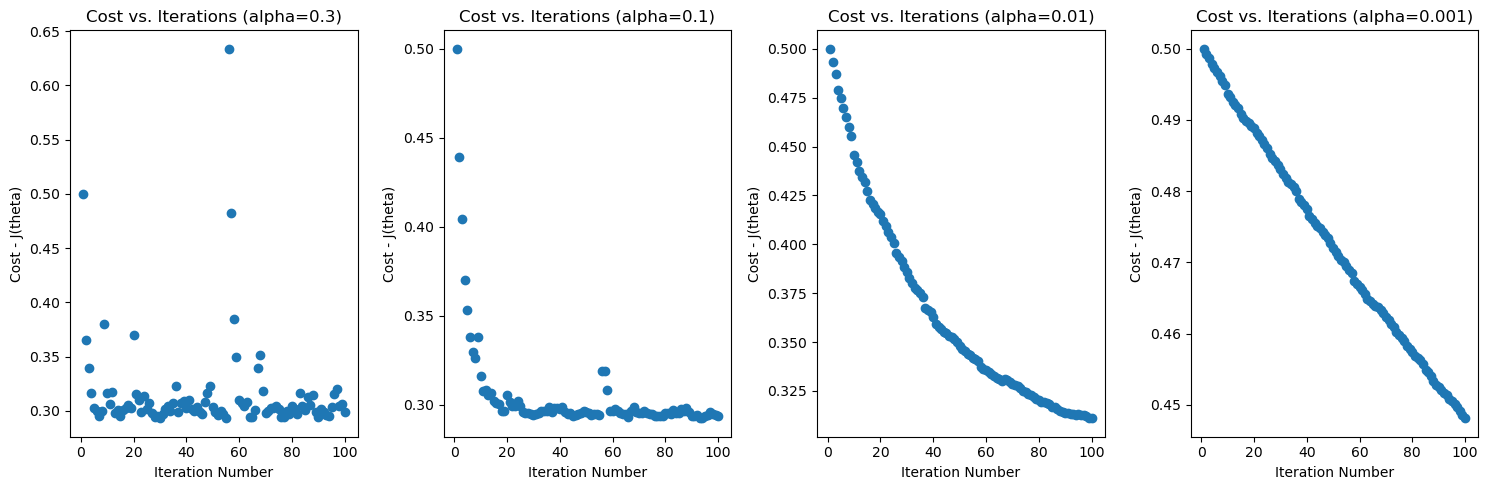

In [11]:
mini_batch_different_alpha(X_normalize, y_normalize)

conclusions: 
from the alpha's that we tested the best alpha is 0.1,
Although it is less stable than the smaller alphas, it converges much faster than them.
And even if we stop at his jump at iteration 60, the cost is still smaller than iteration 80 when the alphas are smaller.

In summary, the vanilla method demonstrates greater stability compared to the batch approach. With vanilla, we could afford a larger alpha that converges swiftly yet remains stable, requiring approximately 10 iterations to reach minimal cost. Conversely, the batch method necessitates a smaller alpha, resulting in roughly 20 iterations to achieve a minimum cost. However, despite the increased iteration count, the batch approach remains advantageous due to its efficiency. Batch processing involves only 64 samples per iteration in our scenario, contrasting with vanilla, which traverses all 3047 samples in each iteration. This streamlined sampling process contributes to faster convergence and computational efficiency, making the batch method a preferred choice. 

### In conclusion, based on the observed results, it is advisable to utilize a batch size of 64 coupled with an alpha value of 0.1 for optimal performance in the gradient descent algorithm.

## SVD:

In [12]:
full_normalized_data=full_df.iloc[:,1:] # without intercept 
U,s,V=np.linalg.svd(full_normalized_data,full_matrices=False)
print(f'before: U shape is{U.shape} s shape is {s.shape}')
k = 3
# Reduce dimensions using SVD:
U_k = U[:, :k] #extracts the first k columns from the matrix.
s_k = np.diag(s[:k]) #selects the first k singular values from the array s. 
V_k = V[:k, :]#selects the first k rows from the matrix V
print(f'after: U shape is{U_k.shape} s shape is {s_k.shape}')
# Reconstruct the data after SVD reduction
data_after_svd=pd.DataFrame(U_k @ s_k)
intercept= pd.Series(1, index=data_after_svd.index)
data_after_svd.insert(0, 'intercept', intercept)
# Separate features (X_svd) and target variable (y_svd) from the reconstructed data:
X_svd = data_after_svd.iloc[:,:-1]
y_svd = data_after_svd.iloc[:,-1]

before: U shape is(3047, 10) s shape is (10,)
after: U shape is(3047, 3) s shape is (3, 3)


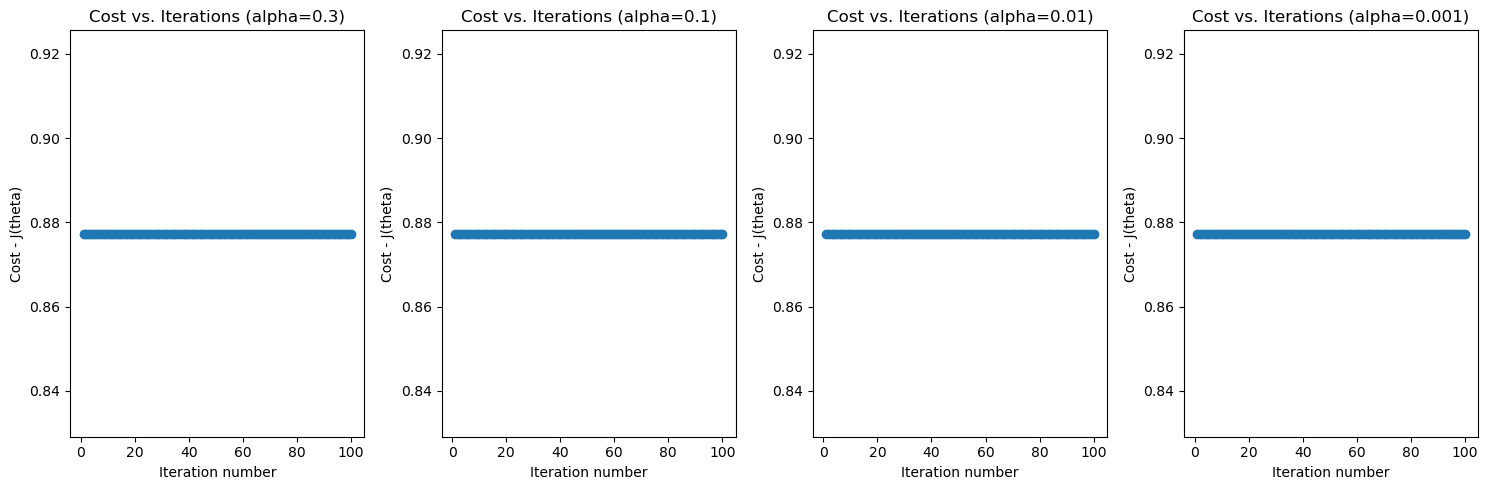

In [13]:
vanilla_for_different_alpha(X_svd,y_svd)

In summary, Singular Value Decomposition (SVD) offers a significant advantage in noise reduction. Through SVD, the resulting dimensionally reduced representation of the data exhibits smaller costs from the outset and achieves lower minimal costs compared to normal data. This noise reduction not only enhances the efficiency and accuracy of subsequent modeling processes but also holds the potential to improve overall model performance and interpretability.

### In conclusion, after careful analysis of the results, it is recommended to preprocess the data using Singular Value Decomposition (SVD) for noise reduction. Subsequently, employing a batch size of 64 along with an alpha value of 0.1 yields optimal performance.

## Run time testing:

In [ ]:

num_repetitions = 10

# Define the callable object (function) to test
def function_to_test2():
  SGD(X_svd,y_svd)

execution_times = []
for _ in range(num_repetitions):
    execution_time2 = timeit.timeit(function_to_test2, number=1)
    execution_times.append(execution_time2)

# Calculate the average execution time
average_execution_time = np.mean(execution_times)
print(f'Vanilla SGD with SVD, average run time: {average_execution_time}')


# Define the callable object (function) to test
def function_to_test1():
  batch_gradient_descent(X_svd,y_svd)

execution_times = []
for _ in range(num_repetitions):
    execution_time1 = timeit.timeit(function_to_test1, number=1)
    execution_times.append(execution_time1)

# Calculate the average execution time
average_execution_time = np.mean(execution_times)
print(f'Batch SGD with SVD, average run time: {average_execution_time}')


Vanilla SGD with SVD, average run time: 0.16839030000846833
Batch SGD with SVD, average run time: 0.22353070999961347


In [ ]:
# Define the callable object (function) to test
def function_to_test4():
  SGD(X_normalize,y_normalize)

execution_times = []
for _ in range(num_repetitions):
    execution_time = timeit.timeit(function_to_test4, number=1)
    execution_times.append(execution_time)

# Calculate the average execution time
average_execution_time = np.mean(execution_times)
print(f'Vanilla SGD, average run time: {average_execution_time}')


# Define the callable object (function) to test
def function_to_test3():
  batch_gradient_descent(X_normalize,y_normalize)

execution_times = []
for _ in range(num_repetitions):
    execution_time = timeit.timeit(function_to_test3, number=1)
    execution_times.append(execution_time)

# Calculate the average execution time
average_execution_time = np.mean(execution_times)
print(f'Batch SGD, average run time: {average_execution_time}')

Vanilla SGD, average run time: 0.16072814000071958
Batch SGD, average run time: 0.19234455999685451


Although it might not be immediately apparent due to the small sample size, upon doubling the sample, the efficiency advantage of the batch method over vanilla becomes evident. With a larger dataset, the reduced computational burden of the batch approach becomes more pronounced, showcasing its superior efficiency compared to vanilla.